In [128]:
import pandas as pd
import numpy  as np

In [129]:
df = pd.read_csv('spam-og.csv', encoding='latin1')
print(df.head())
print(df.shape)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
(5572, 5)


### 1.DATA CLEANING----------

In [130]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [131]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [132]:
#rename cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [133]:
df.columns

Index(['target', 'text'], dtype='object')

In [134]:
# ham and spam name changes and Save the modified DataFrame back to CSV
df['target'] = df['target'].replace({'spam': 1, 'ham': 0})

In [135]:
print(df.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [136]:
print(df.isnull().sum())

print(df.duplicated().sum())

target    0
text      0
dtype: int64
403


In [137]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [138]:
print(df.shape)

(5169, 2)


In [139]:
df.to_csv('spam.csv', index=False)


### 2.EXPLORATORY DATA ANALYSIS------------

In [140]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [141]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

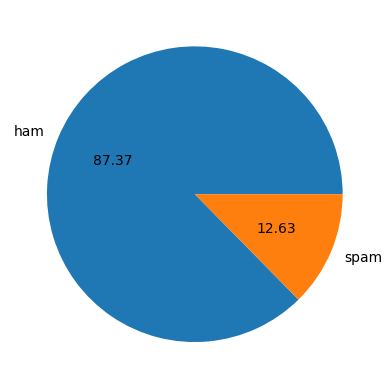

In [142]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Data is imbalnced known from above

In [143]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
# count no of characters
df['num_characters']=df['text'].apply(len)

In [145]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [146]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [148]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [149]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [151]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

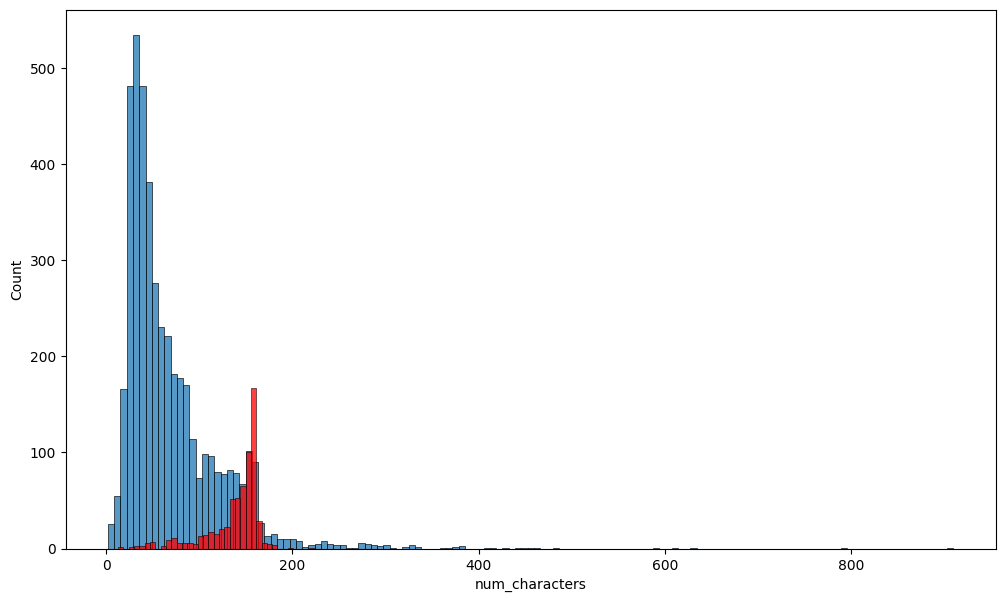

In [152]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

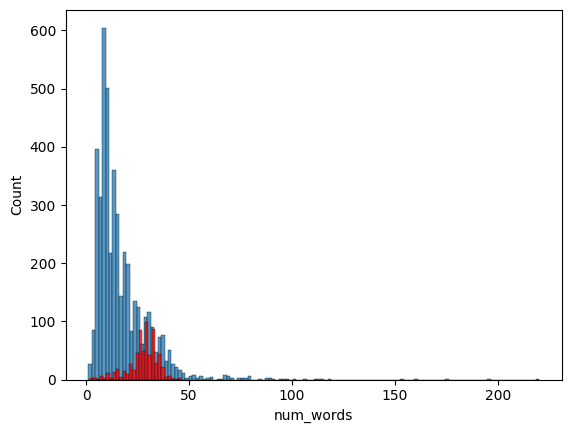

In [153]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

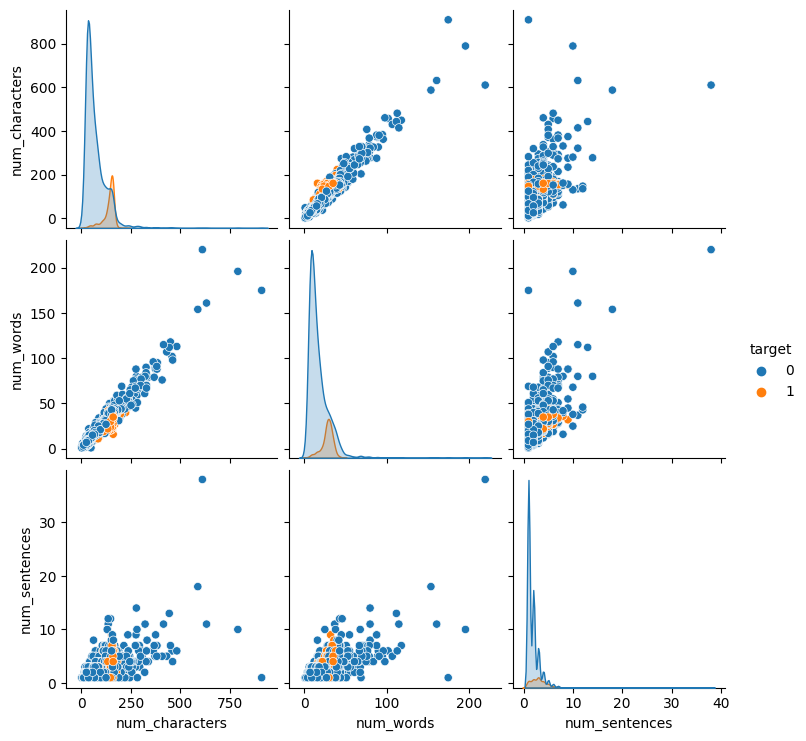

In [154]:
sns.pairplot(df,hue='target')

In [155]:
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### 3.Data Preprocessing---------

In [156]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [157]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [158]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# root form
ps.stem('pikachuing')

'pikachu'

In [159]:
def transform_text(text):
   text = text.lower()
   text = nltk.word_tokenize(text)

   y=[]
   for i in text:
      if i.isalnum():
         y.append(i)

   text=y[:]
   y.clear()

   stopp=stopwords.words('english')
   punct=string.punctuation

   for i in text:
      if i not in stopp and i not in punct:
         y.append(i)

   text=y[:]
   y.clear()

   for i in text:
      y.append(ps.stem(i))
   return " ".join(y)

In [160]:
transform_text('hello pikachu like my 20% rockz. How are you liking lecture bro?')

'hello pikachu like 20 rockz like lectur bro'

In [161]:
df['transformed_text']=df['text'].apply(transform_text)

In [162]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [163]:
# WordCloud shows important messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [164]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


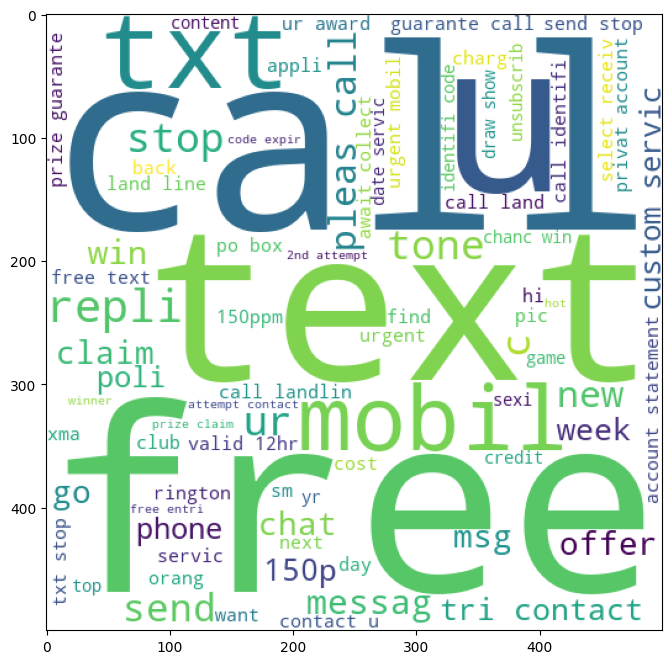

In [165]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)
plt.show()


In [166]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

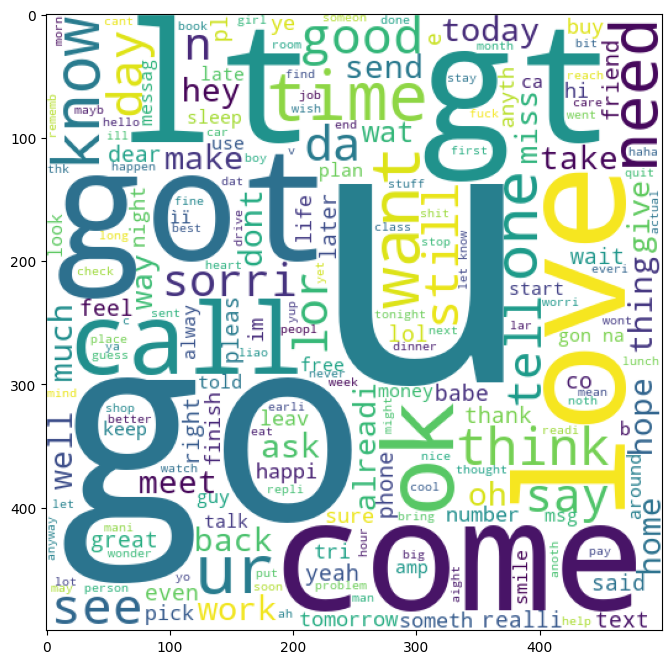

In [167]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)
plt.show()

In [168]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [169]:
len(spam_corpus)


9939

# see top 30 most occurring words in Spam and Ham corpus

In [170]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

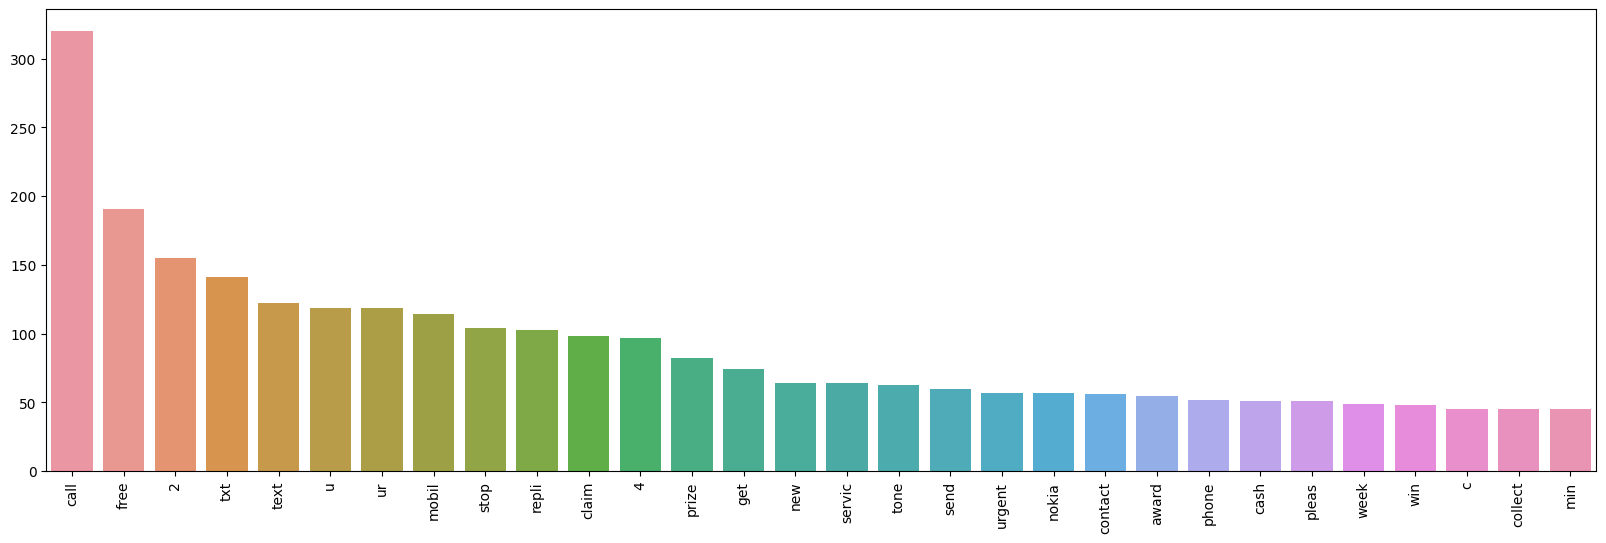

In [171]:
word_counts = Counter(spam_corpus)

# Extracting the 30 most common words and their counts
most_common_words = word_counts.most_common(30)
words = [word[0] for word in most_common_words]
counts = [count[1] for count in most_common_words]

# Plotting the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()


In [172]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

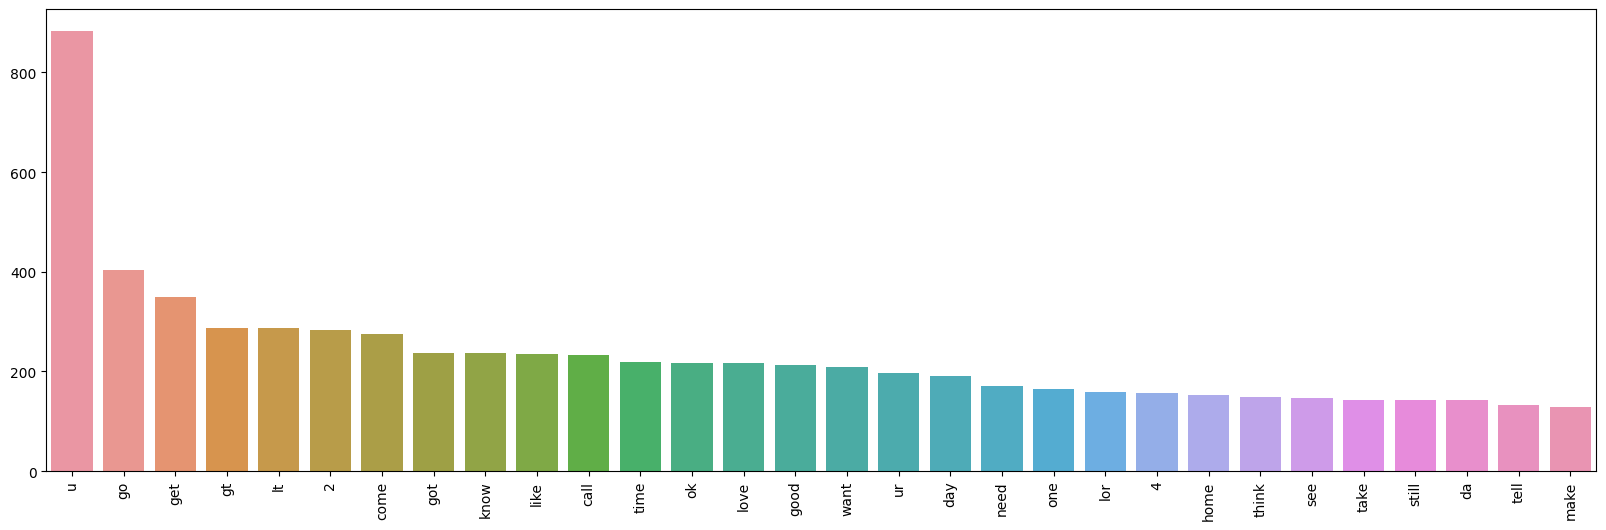

In [173]:
word_counts = Counter(ham_corpus)

# Extracting the 30 most common words and their counts
most_common_words = word_counts.most_common(30)
words = [word[0] for word in most_common_words]
counts = [count[1] for count in most_common_words]

# Plotting the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()


### 4.Vectorization-----------

In [174]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# using bag of words
'''
TF: Term Frequency, which measures how frequently a term occurs in a document. 
Since every document is different in length, it is possible that a term would
appear much more times in long documents than shorter ones. 
Thus, the term frequency is often divided by the document length (aka.
the total number of terms in the document) as a way of normalization:
'''

#Setting max_features to 3000 here after tring multiple random values this ones shows best results
tfidf = TfidfVectorizer(max_features=3000)


In [175]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [176]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 5.Model Building----------
Using Naive Bayes as it is proven to give best results on Textual data


In [177]:
X.shape

(5169, 3000)

In [178]:
y = df['target'].values


In [179]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [180]:
# model
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [183]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [184]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [185]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [186]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Other model pipelines

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [188]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =  BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [189]:
# DICTIONARY OF CLASSIFIERS

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
}


In [190]:
# from sklearn.metrics import recall_score, f1_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #train_accuracy = accuracy_score(X_train, y_train)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    # recall = recall_score(y_test, y_pred)
    # return accuracy,precision,f1,recall

    return accuracy,precision


In [191]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [192]:
accuracy_scores = []
precision_scores = []
# f1_scores = []
# recall_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
   #  current_accuracy, current_precision, f1_score, recall_score = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("\nFor classifier ",name, ":")

    print("  Test_Accuracy - ",current_accuracy)
    print("  Precision - ", current_precision)
   #  print("  F1 Score - ", f1_score)
   #  print("  Recall - ",recall_score)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
   #  f1_scores.append(f1_score)
   #  recall_scores.append(recall_score)



For classifier  SVC :
  Test_Accuracy -  0.9758220502901354
  Precision -  0.9747899159663865

For classifier  KN :
  Test_Accuracy -  0.9052224371373307
  Precision -  1.0

For classifier  NB :
  Test_Accuracy -  0.9709864603481625
  Precision -  1.0

For classifier  DT :
  Test_Accuracy -  0.9332688588007737
  Precision -  0.8415841584158416

For classifier  LR :
  Test_Accuracy -  0.9584139264990329
  Precision -  0.9702970297029703

For classifier  RF :
  Test_Accuracy -  0.9758220502901354
  Precision -  0.9829059829059829

For classifier  AdaBoost :
  Test_Accuracy -  0.960348162475822
  Precision -  0.9292035398230089

For classifier  BgC :
  Test_Accuracy -  0.9584139264990329
  Precision -  0.8682170542635659

For classifier  ETC :
  Test_Accuracy -  0.9748549323017408
  Precision -  0.9745762711864406

For classifier  GBDT :
  Test_Accuracy -  0.9468085106382979
  Precision -  0.9191919191919192

For classifier  XGB :
  Test_Accuracy -  0.9671179883945842
  Precision -  0.93

In [193]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Test_Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [194]:
performance_df

,Algorithm,Test_Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [195]:
from matplotlib.colors import ListedColormap

cmap2 = ListedColormap(['turquoise','#ff8975'])
performance_df.style.background_gradient(cmap=cmap2)

,Algorithm,Test_Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [196]:
performance_df


,Algorithm,Test_Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [197]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [198]:
performance_df1

,Algorithm,variable,value
0,KN,Test_Accuracy,0.905222
1,NB,Test_Accuracy,0.970986
2,RF,Test_Accuracy,0.975822
3,SVC,Test_Accuracy,0.975822
4,ETC,Test_Accuracy,0.974855
5,LR,Test_Accuracy,0.958414
6,XGB,Test_Accuracy,0.967118
7,AdaBoost,Test_Accuracy,0.960348
8,GBDT,Test_Accuracy,0.946809
9,BgC,Test_Accuracy,0.958414


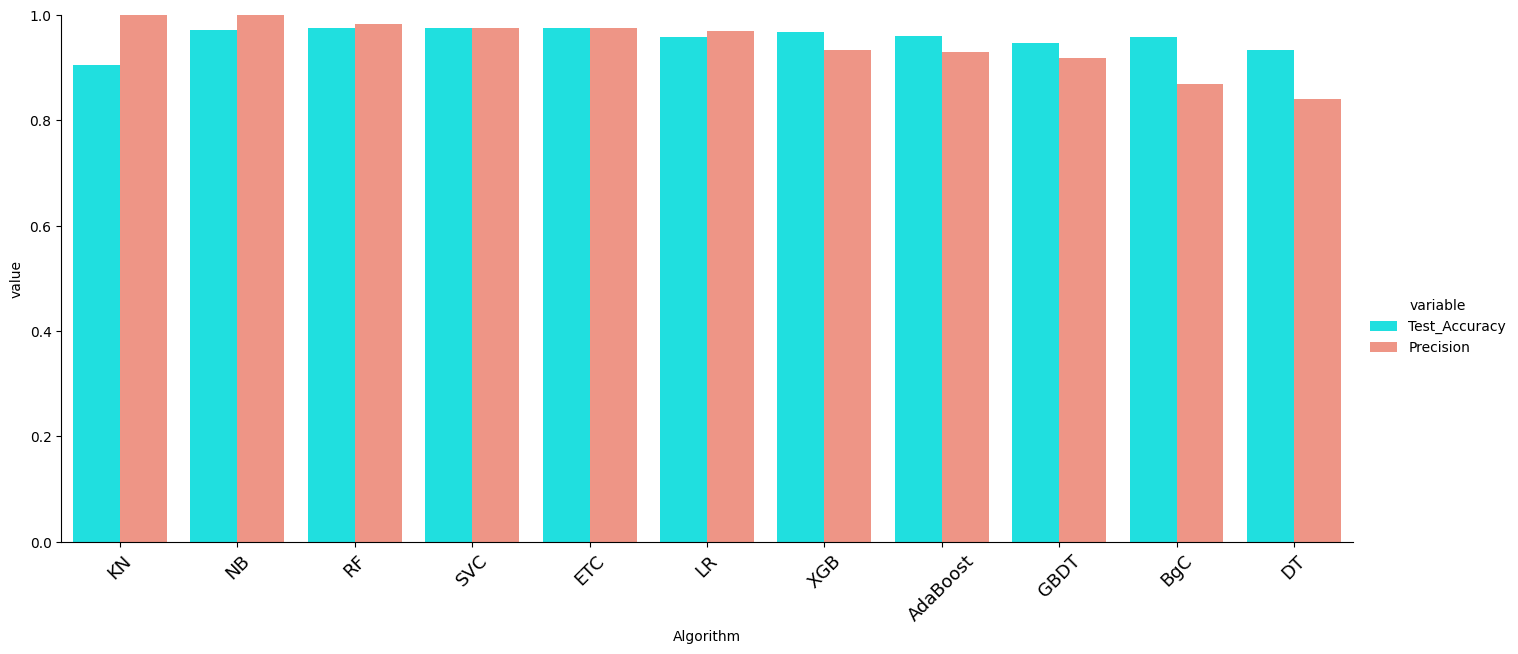

In [199]:
cols = cols = ['cyan', '#ff8975']
plt = sns.catplot(x='Algorithm', y='value',
                  hue='variable', data=performance_df1, kind='bar', height=6, palette=cols, aspect=2.3)


plt.set(ylim=(0, 1.0))
for axes in plt.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, size=13)


### Model improvements
Best Improved after using :
1.max_features = 3000 in TFIDF

Remaining 2 methods were not that great
2.min_max scaler
3.voting and stacking classifiers (combination of best performing models)

# max-features = 3000

In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [201]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [202]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Test_Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,XGB,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [203]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


In [204]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))


In [205]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [206]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [207]:
# new_df_scaled.merge(temp_df,on='Algorithm')


In [208]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier


In [209]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [210]:
# voting.fit(X_train,y_train)


In [211]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))


In [212]:
# Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()


In [213]:
# from sklearn.ensemble import StackingClassifier


In [214]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [215]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))


### FINAL MODEL------------------
Multinomial NAIVE BAYES best till now with max_features = 3000  , selected
Accuracy  : 0.970986	
Precision : 1.000000

In [216]:
import pickle

In [217]:
# making model
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
